In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loading all the datasets into different dataframes





In [2]:
customers=pd.read_csv('/content/Customers.csv')
products=pd.read_csv('/content/Products.csv')
transactions=pd.read_csv('/content/Transactions.csv')

Exploring each dataset





**Customer Dataset**

*  1. Basic Information

In [ ]:
print(customers.info())
print(customers.describe())
print(customers.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South Amer



2.   Check for Missing and Duplicate Data




In [ ]:
print(customers.isnull().sum())
print(customers.duplicated().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
0




3.  Distribution of Customers by Region:



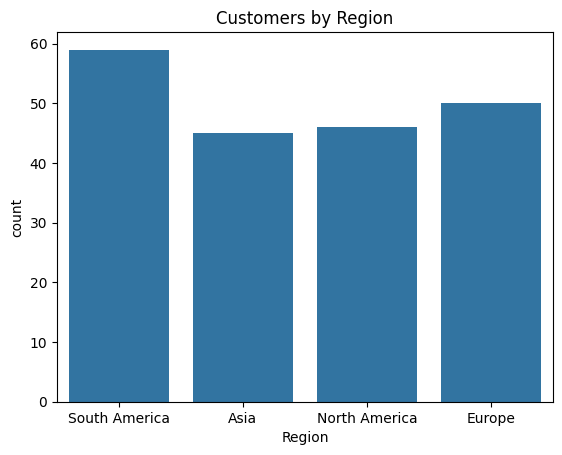

In [ ]:
sns.countplot(x='Region', data=customers)
plt.title('Customers by Region')
plt.show()


**Products Dataset**


1.   Basic Information



In [ ]:
print(products.info())
print(products.describe())
print(products.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31



2.   Check for Missing and Duplicate Data:



In [ ]:
print(products.isnull().sum())
print(products.duplicated().sum())


ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
0




3. Distribution of Products by Category:



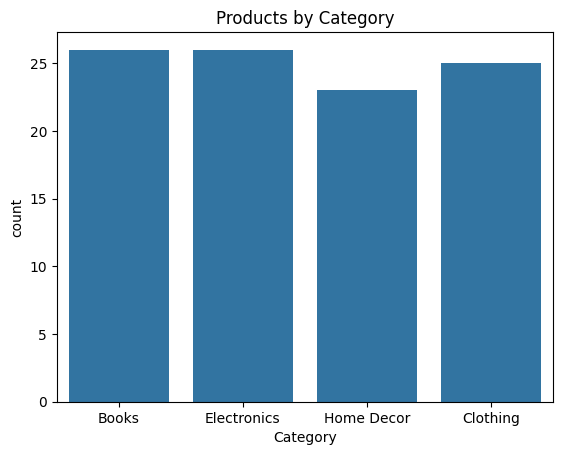

In [ ]:
sns.countplot(x='Category',data=products)
plt.title('Products by Category')
plt.show()

4. Price Distribution:

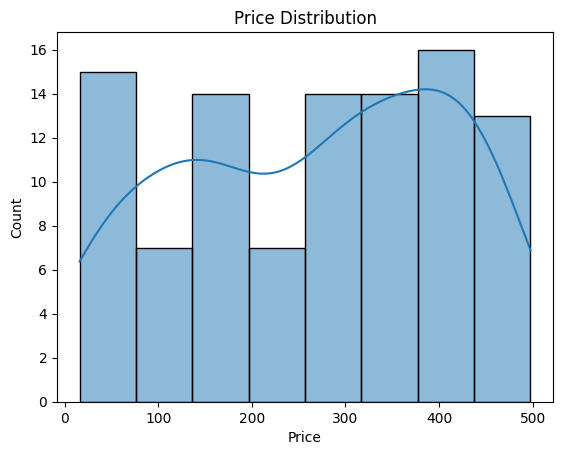

In [ ]:
sns.histplot(products['Price'], kde=True)
plt.title('Price Distribution')
plt.show()


**Transactions Dataset**

1. Basic Information

In [ ]:
print(transactions.info())
print(transactions.describe())
print(transactions.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
  TransactionID C

2. Check for missing and Duplicate Values

In [ ]:
print(transactions.isnull().sum())
print(transactions.duplicated().sum())


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0


3. Transaction Value Analysis

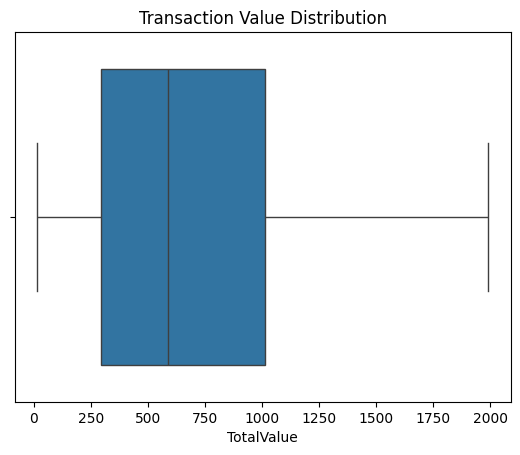

In [ ]:
sns.boxplot(x=transactions['TotalValue'])
plt.title('Transaction Value Distribution')
plt.show()


4. Transaction Trends Over Time

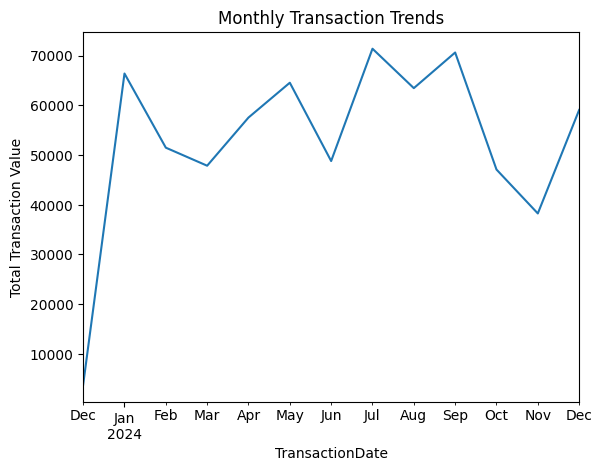

In [ ]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions.set_index('TransactionDate').resample('ME')['TotalValue'].sum().plot()
plt.title('Monthly Transaction Trends')
plt.ylabel('Total Transaction Value')
plt.show()


**Merging Datasets to Derive business insights from the Datasets**

In [ ]:

customers_transactions = pd.merge(transactions, customers, on='CustomerID', how='inner')

complete_data = pd.merge(customers_transactions, products, on='ProductID', how='inner')


# Derving Business Insights

# 1. Purchase Behaviour

Identifying Popular Purchase Times
Analyzing transaction timestamps to determine peak hours, days, or seasons

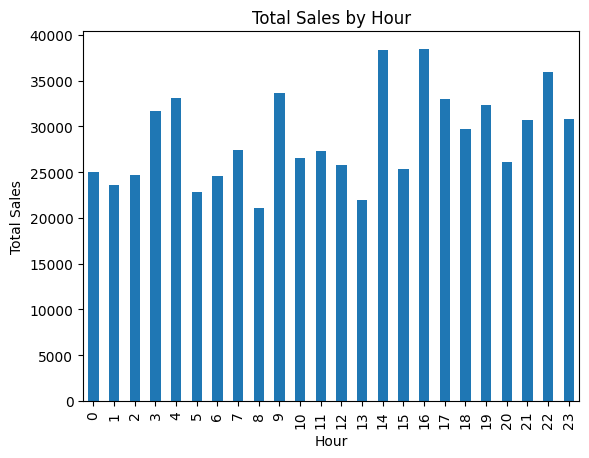

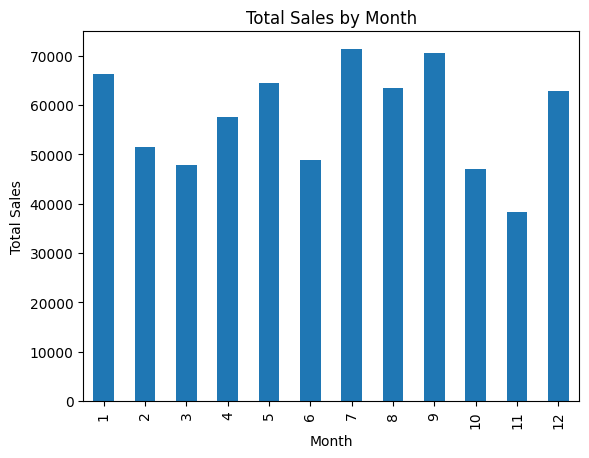

In [ ]:
# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Extract hour of purchase
transactions['Hour'] = transactions['TransactionDate'].dt.hour
hourly_sales = transactions.groupby('Hour')['TotalValue'].sum()

# Visualize peak hours
hourly_sales.plot(kind='bar', title='Total Sales by Hour', ylabel='Total Sales', xlabel='Hour')
plt.show()

# Analyze sales by month
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Visualize monthly sales
monthly_sales.plot(kind='bar', title='Total Sales by Month', ylabel='Total Sales', xlabel='Month')
plt.show()


# 2. Customer Retention

Analyze Repeat Purchase Patterns
Identify customers with multiple transactions to determine loyalty

Loyalty
Frequent      145
Occasional     40
One-Time       12
Loyal           2
Name: count, dtype: int64


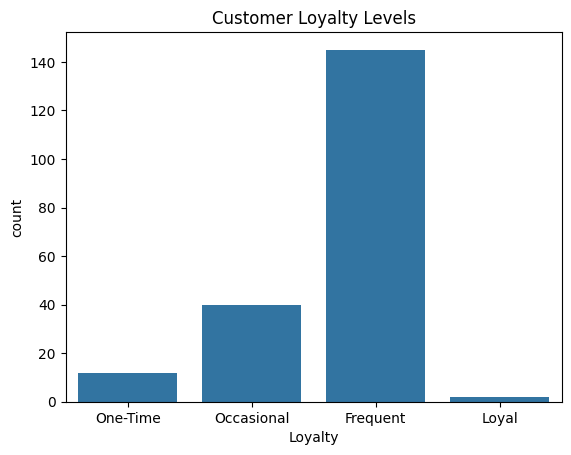

In [ ]:
# Calculate number of transactions per customer
repeat_customers = complete_data.groupby('CustomerID')['TransactionID'].nunique().reset_index()
repeat_customers.columns = ['CustomerID', 'TransactionCount']

# Categorize customers
repeat_customers['Loyalty'] = pd.cut(
    repeat_customers['TransactionCount'],
    bins=[0, 1, 3, 10, float('inf')],
    labels=['One-Time', 'Occasional', 'Frequent', 'Loyal']
)
print(repeat_customers['Loyalty'].value_counts())

# Visualize
sns.countplot(x='Loyalty', data=repeat_customers)
plt.title('Customer Loyalty Levels')
plt.show()


# 3. Customer Segmentation Based on Spending

Calculating total spending for each customer and classifying them into tiers

    CustomerID  TotalValue SpendingTier
0        C0001     3354.52       Medium
1        C0002     1862.74          Low
2        C0003     2725.38       Medium
3        C0004     5354.88         High
4        C0005     2034.24          Low
..         ...         ...          ...
194      C0196     4982.88         High
195      C0197     1928.65          Low
196      C0198      931.83          Low
197      C0199     1979.28          Low
198      C0200     4758.60         High

[199 rows x 3 columns]


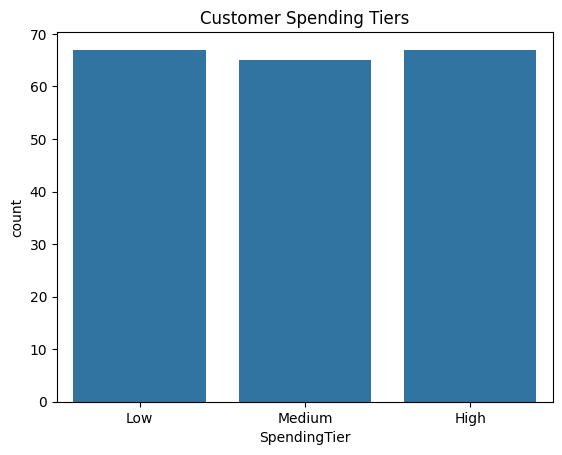

In [ ]:
customer_spending = complete_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending['SpendingTier'] = pd.qcut(customer_spending['TotalValue'], q=3, labels=['Low', 'Medium', 'High'])
print(customer_spending)

# Visualize distribution
sns.countplot(x='SpendingTier', data=customer_spending)
plt.title('Customer Spending Tiers')
plt.show()


# 4. Top Performing Product Categories

Grouping data by Category and calculating total sales

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


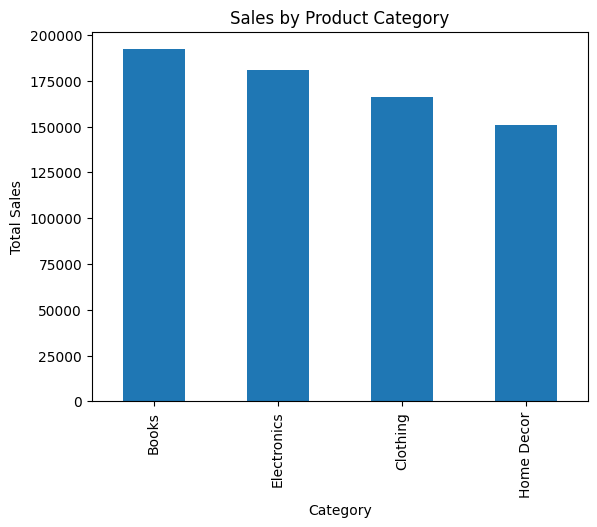

In [ ]:
category_sales = complete_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_sales)

# Visualize
category_sales.plot(kind='bar', title='Sales by Product Category', ylabel='Total Sales', xlabel='Category')
plt.show()


# 5. Region-wise Revenue Contribution

Group data by Region and calculate total revenue

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


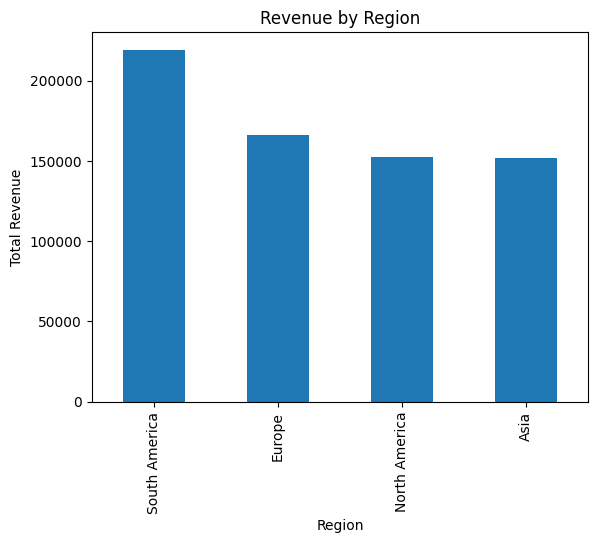

In [ ]:
region_revenue = complete_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_revenue)

# Visualize
region_revenue.plot(kind='bar', title='Revenue by Region', ylabel='Total Revenue', xlabel='Region')
plt.show()
